#### Getting an overview of the release year of the movies.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir(os.pardir)

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

mpl.rcParams['figure.dpi']= 300

In [4]:
from utils import data_load

In [5]:
movie_df = data_load.load_cmu_movie_metadata()

In [6]:
movie_df.head()

,wikipedia_movie_id,freebase_id,movie_name,release_date,revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,[German Language],[Germany],[Drama]


In [7]:
dates = movie_df.release_date.apply(lambda d: d.year).dropna().sort_values(ascending=True)
print(f"Dataset contains {len(dates)} movies from {dates.min()} to {dates.max()}")

Dataset contains 74839 movies from 1888.0 to 2016.0


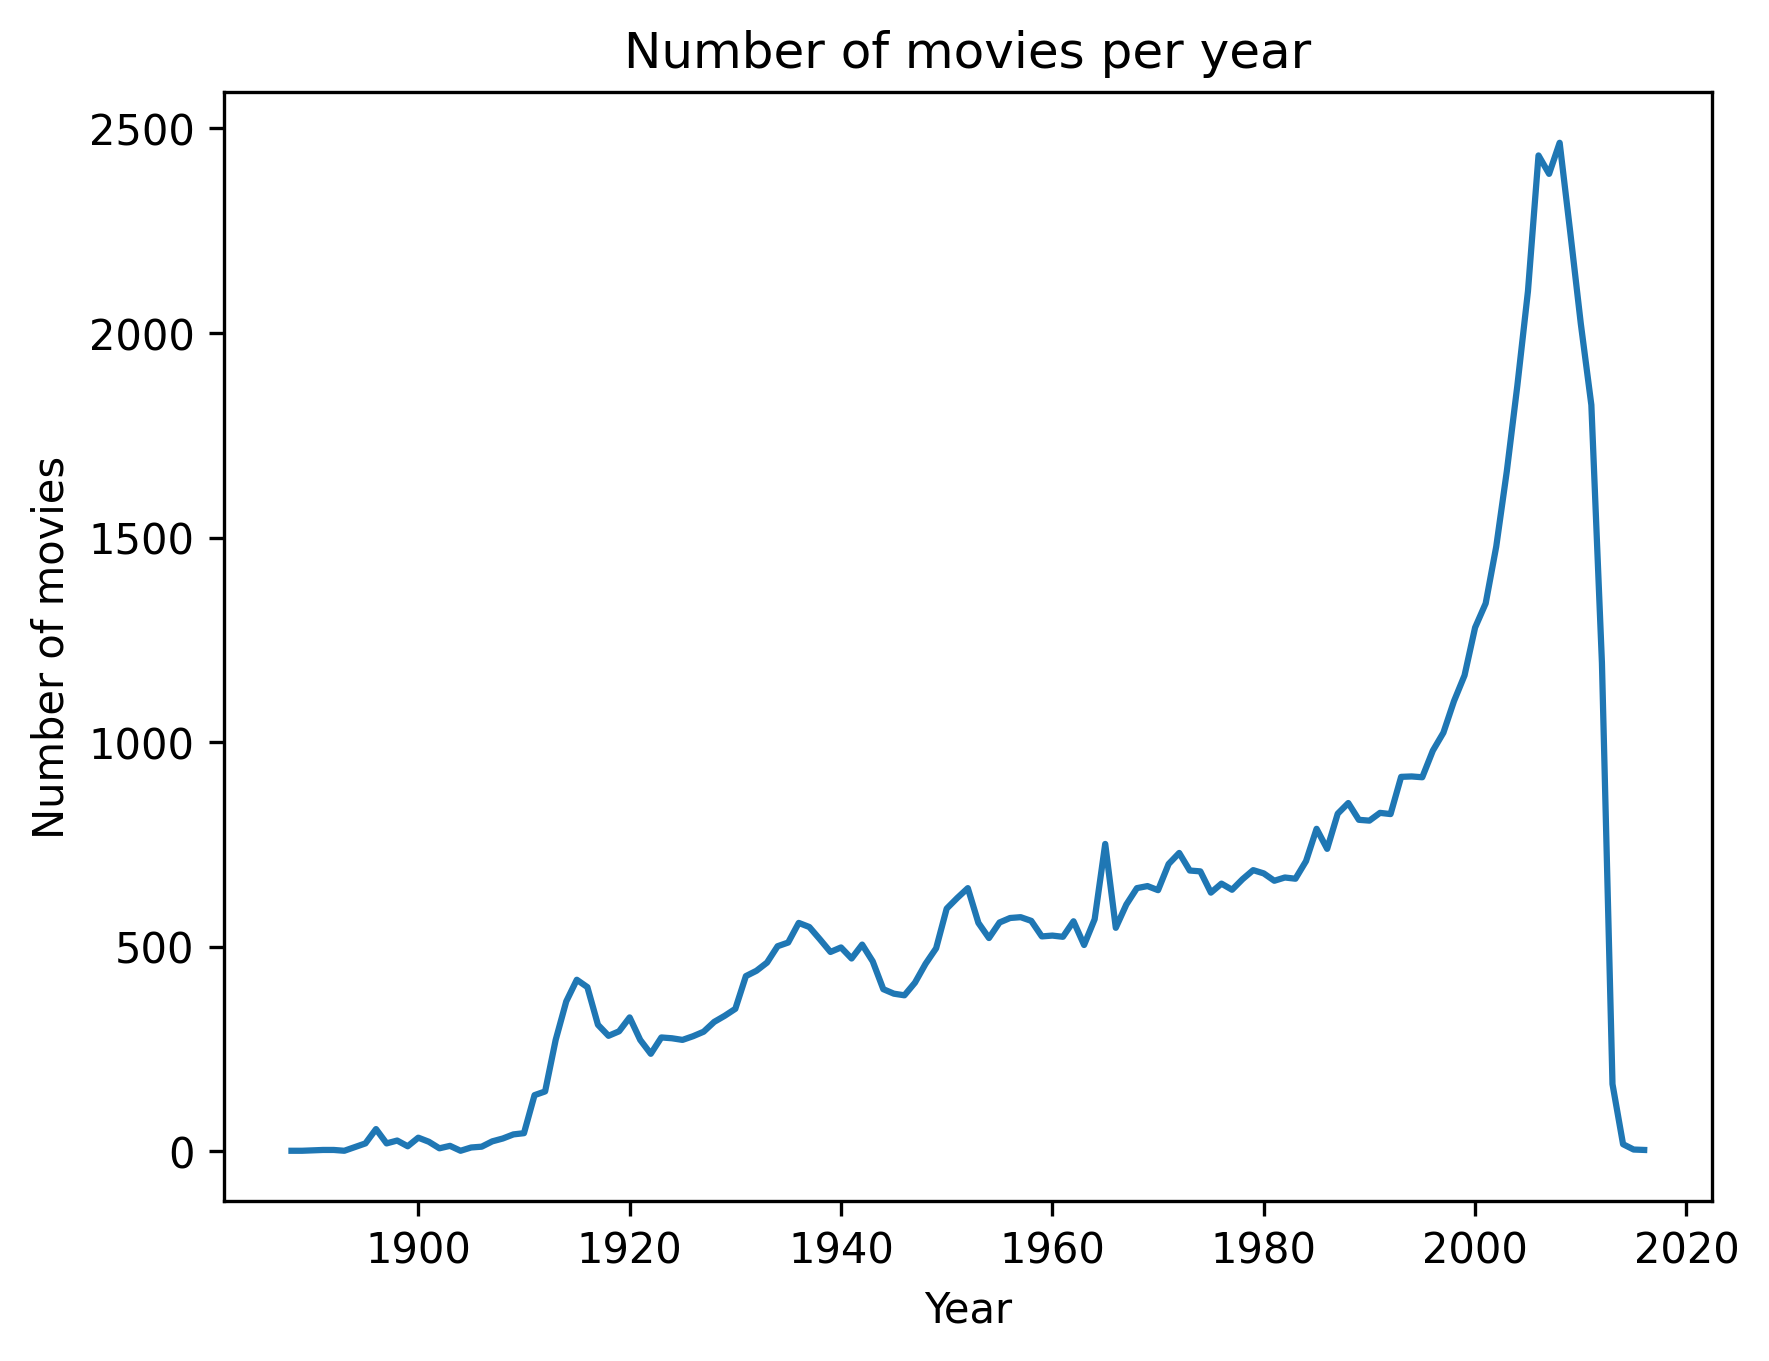

In [8]:
dates.value_counts().sort_index().plot()
plt.title("Number of movies per year")
plt.xlabel("Year")
plt.ylabel("Number of movies")
plt.show()

In [9]:
n_movies_per_year = movie_df.copy()
n_movies_per_year["year"] = n_movies_per_year.release_date.apply(lambda d: d.year)
n_movies_per_year = n_movies_per_year.groupby("year").freebase_id.agg("count")

In [10]:
n_movies_per_year.sort_values(ascending=False).head(20)

year
2008.0    2465
2006.0    2434
2007.0    2389
2009.0    2247
2005.0    2102
2010.0    2023
2004.0    1872
2011.0    1824
2003.0    1662
2002.0    1478
2001.0    1339
2000.0    1280
2012.0    1194
1999.0    1163
1998.0    1100
1997.0    1023
1996.0     979
1994.0     916
1993.0     915
1995.0     914
Name: freebase_id, dtype: int64

Increasing from movies from 1990, before slightly raising from 1920 on.

In [11]:
n_movies_per_year.sort_index(ascending=False).head(10)

year
2016.0       3
2015.0       4
2014.0      17
2013.0     164
2012.0    1194
2011.0    1824
2010.0    2023
2009.0    2247
2008.0    2465
2007.0    2389
Name: freebase_id, dtype: int64

It seems like we have missing data from 2012. From 2016 on we have no values, this is due to the discontinuation of Freebase, the source of the CMU Movies Summary dataset.

We should only take data from 1920 until 2016.